<a href="https://colab.research.google.com/github/Sahithi246/Loan_prediction/blob/main/LOAN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MACHINE LEARNING USING PYTHON FINAL PROJECT 

PROBLEM STATEMENT : Predict if a customer would be signing a loan or not

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import libraries
import matplotlib.pyplot as plt
%matplotlib inline                  
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#import libraries
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [ ]:
#read the dataset
df_train=pd.read_csv('/content/drive/MyDrive/train_u6lujuX_CVtuZ9i.csv')
df_test=pd.read_csv('/content/drive/MyDrive/test_Y3wMUE5_7gLdaTN.csv')

In [ ]:
#print first 5 rows
df_train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
#print first 5 rows
df_test.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
#print the list of columns of train data
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
#print the list of columns of test data
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
#printing the list of rows and columns of both train data and test data
df_train.shape,df_test.shape 

((614, 13), (367, 12))

# Univariate Analysis


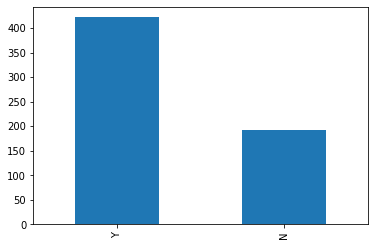

In [ ]:
#analysing data
#Here we analyse the data using single variable
df_train['Loan_Status'].value_counts().plot.bar()

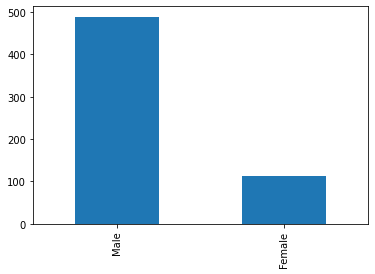

In [ ]:
df_train['Gender'].value_counts().plot.bar()

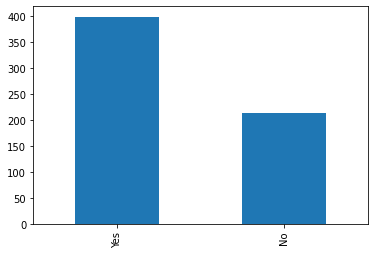

In [ ]:
df_train['Married'].value_counts().plot.bar()

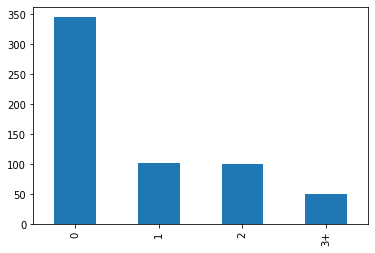

In [ ]:
df_train['Dependents'].value_counts().plot.bar()

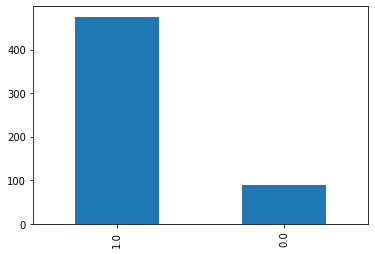

In [ ]:
df_train['Credit_History'].value_counts().plot.bar()

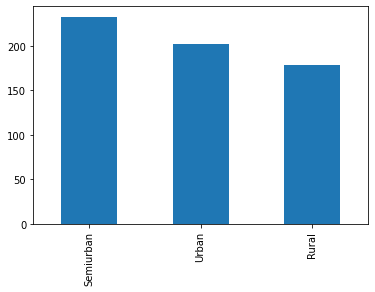

In [ ]:
df_train['Property_Area'].value_counts().plot.bar()

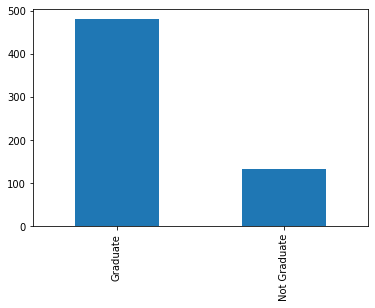

In [ ]:
df_train['Education'].value_counts().plot.bar()

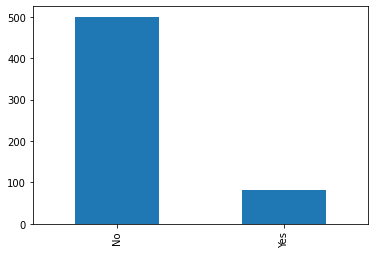

In [ ]:
df_train['Self_Employed'].value_counts().plot.bar()

From the above patterns,it is clear that 
1.We can see that approximately 81% are Male and 19% are female.
2.Percentage of applicants with no dependents is higher.
3.There are more number of graduates than non graduates.
4.Percentage of applicants with no dependents is higher.
5.Larger Percentage of people have a good credit history.
6.The percentage of people that the loan has been approved has been higher rather than the percentage of applicant for which the loan has been declined.
7.Also it is observed that majority of self employed applicant's Loan_Status is negative(i.e;No).

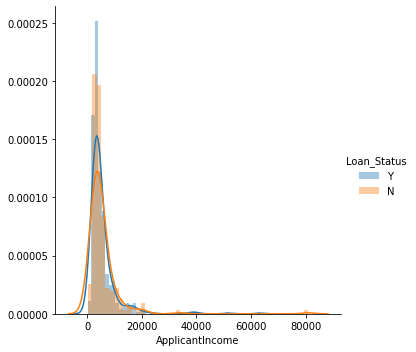

In [ ]:
#As our main target is Loan_Status Variable ,let us try to find if Applicant income can exactly separate the Loan_Status. 
#Suppose if i can find that if applicant income is above some X amount then Loan Status is yes,Else it is No. 
#Firstly I'm trying to plot the distribution plot based on the attribute Loan_Status. 
#Here X-axis is ApplicantIncome and Y-axis is frequency
sns.set_style=("whitegrid");
sns.FacetGrid(df_train,hue="Loan_Status",size=5)\
.map(sns.distplot,"ApplicantIncome")\
.add_legend();
plt.show()


from the above figure ,we can say that Loan_status is Yes whose income is not greater than 20000.Else it is No

# Bivariate Analysis

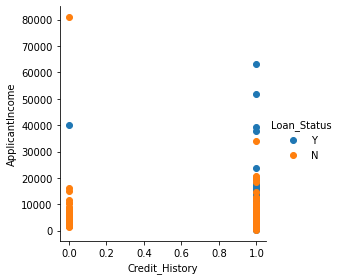

In [ ]:
##analysing data
#Here we analyse the data using Two variables
sns.set_style=("whitegrid");
sns.FacetGrid(df_train,hue="Loan_Status",size=4)\
.map(plt.scatter,"Credit_History","ApplicantIncome")\
.add_legend();
plt.show()


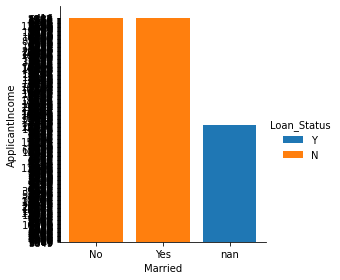

In [ ]:
sns.set_style=("whitegrid");
df_train["Married"]=df_train["Married"].apply(str)
sns.FacetGrid(df_train,hue="Loan_Status",size=4)\
.map(plt.bar,"Married","ApplicantIncome")\
.add_legend();
plt.show()


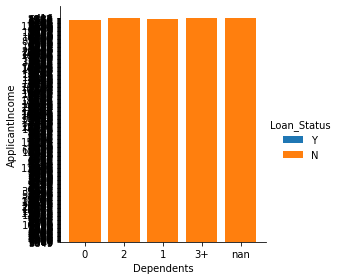

In [ ]:
sns.set_style=("whitegrid");
df_train["Dependents"]=df_train["Dependents"].apply(str)
sns.FacetGrid(df_train,hue="Loan_Status",size=4)\
.map(plt.bar,"Dependents","ApplicantIncome")\
.add_legend();
plt.show()


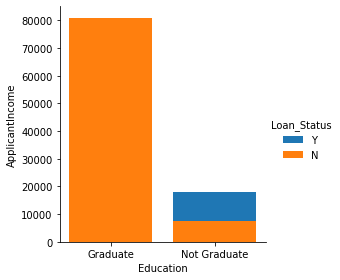

In [ ]:
sns.set_style=("whitegrid");
sns.FacetGrid(df_train,hue="Loan_Status",size=4)\
.map(plt.bar,"Education","ApplicantIncome")\
.add_legend();
plt.show()


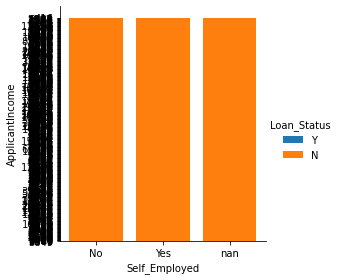

In [ ]:
sns.set_style=("whitegrid");
df_train["Self_Employed"]=df_train["Self_Employed"].apply(str)
sns.FacetGrid(df_train,hue="Loan_Status",size=4)\
.map(plt.bar,"Self_Employed","ApplicantIncome")\
.add_legend();
plt.show()


We can infer that 
1.percentage of married people who have got their loan approved is higher when compared to non- married people.
2.The percentage of applicants with either 0 or 2 dependents have got their loan approved is higher.
3.The percentage of applicants who are graduates have got their loan approved rather than the one who are not graduates.
4.There is hardly any correlation between Loan_Status and Self_Employed applicants. So in short we can say that it doesn’t matter whether the applicant is self employed or not.

# DATA CLEANING

In [ ]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

we observe that there are more missing values.Now we are going to replace the categorical values by most occuring values and numerical values by mean

# IMPUTING MISSING VALUES

In [ ]:
# filling out categorical values
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)

In [ ]:
#finding mean inorder to fill the missing values
df_train['LoanAmount'].mean()

146.41216216216216

In [ ]:
#finding median inorder to fill the missing values
df_train['LoanAmount'].median()


128.0

In [ ]:
#finding mode inorder to fill the missing values
df_train['LoanAmount'].mode()

0    120.0
dtype: float64

In [ ]:
#filling the missing values with median value
df_train['LoanAmount'].fillna(128,inplace=True)

In [ ]:
df_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#There are missing values in Loan_Amount_Term.Here,we are printing the Loan_Amount_Term values. 
df_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
#finding meadian
df_train['Loan_Amount_Term'].median()

360.0

In [ ]:
#finding mode
df_train['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [ ]:
#Since there is no difference in median and mode value so we are imputing the missing value by 360
df_train['Loan_Amount_Term'].fillna(360,inplace=True)

In [ ]:
#cross checking the null values
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

there are no missing values

In [ ]:
#As we have told in previous occasion that Loan_ID should be unique. 
#So if there n number of rows, there should be n number of unique Loan_ID’s. 
#Let us check for that. If there are any duplicate values we can remove that.
df_train.apply(lambda x: len(x.unique()))

Loan_ID              614
Gender                 2
Married                3
Dependents             5
Education              2
Self_Employed          3
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

There are 614 rows in our train data set, there should be 614 unique Loan_ID’s. Fortunately there are no duplicate values. We can also see that for Gender, Married, Education and Self_Employed columns, the values are only 2 which is evident after cleaning the data-set.

In [ ]:
#making a copy of train data
t1=df_train.copy()

In [ ]:
#making a copy of test data
t2=df_test.copy()

In [ ]:
t1.head(2) 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [ ]:
t2.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban


In [ ]:
#As our target variable is Loan_Status. 
# We are storing it in a variable called Y. 
# But before doing all these we are dropping LOAN_ID column in both the data sets. 
# Here it goes
df_train1=t1.drop('Loan_ID',axis=1)
df_test1=t2.drop('Loan_ID',axis=1)

In [ ]:
X=df_train1.drop('Loan_Status',1)
Y=df_train1.Loan_Status

In [ ]:
X.shape

(614, 11)

In [ ]:
Y.head(2)

0    Y
1    N
Name: Loan_Status, dtype: object

In [ ]:
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural


In [ ]:
# As we are having a lot of categorical variables that are affecting Loan Status. 
# We need to convert each of them in to numeric data for modeling.
X=pd.get_dummies(X)
df_train1=pd.get_dummies(df_train1)
df_test1=pd.get_dummies(df_test1)

In [ ]:
X.head(5)

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Married_nan,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_nan,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,ApplicantIncome_1000,ApplicantIncome_10000,ApplicantIncome_10047,ApplicantIncome_10139,ApplicantIncome_1025,ApplicantIncome_10408,ApplicantIncome_10416,ApplicantIncome_10513,ApplicantIncome_10750,ApplicantIncome_10833,ApplicantIncome_11000,ApplicantIncome_11146,ApplicantIncome_11250,ApplicantIncome_11417,ApplicantIncome_11500,ApplicantIncome_11757,ApplicantIncome_12000,ApplicantIncome_12500,ApplicantIncome_12841,ApplicantIncome_12876,ApplicantIncome_1299,...,ApplicantIncome_7333,ApplicantIncome_7441,ApplicantIncome_7451,ApplicantIncome_7578,ApplicantIncome_7583,ApplicantIncome_7660,ApplicantIncome_7667,ApplicantIncome_7740,ApplicantIncome_7787,ApplicantIncome_7901,ApplicantIncome_7933,ApplicantIncome_7948,ApplicantIncome_8000,ApplicantIncome_8072,ApplicantIncome_8080,ApplicantIncome_81000,ApplicantIncome_8300,ApplicantIncome_8333,ApplicantIncome_8334,ApplicantIncome_8566,ApplicantIncome_8624,ApplicantIncome_8666,ApplicantIncome_8750,ApplicantIncome_8799,ApplicantIncome_9083,ApplicantIncome_9166,ApplicantIncome_9167,ApplicantIncome_9323,ApplicantIncome_9328,ApplicantIncome_9357,ApplicantIncome_9504,ApplicantIncome_9508,ApplicantIncome_9538,ApplicantIncome_9560,ApplicantIncome_9703,ApplicantIncome_9833,ApplicantIncome_9963,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,128.0,360.0,1.0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1508.0,128.0,360.0,1.0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.0,66.0,360.0,1.0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.0,141.0,360.0,1.0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X.head(2)

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Married_nan,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_nan,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,ApplicantIncome_1000,ApplicantIncome_10000,ApplicantIncome_10047,ApplicantIncome_10139,ApplicantIncome_1025,ApplicantIncome_10408,ApplicantIncome_10416,ApplicantIncome_10513,ApplicantIncome_10750,ApplicantIncome_10833,ApplicantIncome_11000,ApplicantIncome_11146,ApplicantIncome_11250,ApplicantIncome_11417,ApplicantIncome_11500,ApplicantIncome_11757,ApplicantIncome_12000,ApplicantIncome_12500,ApplicantIncome_12841,ApplicantIncome_12876,ApplicantIncome_1299,...,ApplicantIncome_7333,ApplicantIncome_7441,ApplicantIncome_7451,ApplicantIncome_7578,ApplicantIncome_7583,ApplicantIncome_7660,ApplicantIncome_7667,ApplicantIncome_7740,ApplicantIncome_7787,ApplicantIncome_7901,ApplicantIncome_7933,ApplicantIncome_7948,ApplicantIncome_8000,ApplicantIncome_8072,ApplicantIncome_8080,ApplicantIncome_81000,ApplicantIncome_8300,ApplicantIncome_8333,ApplicantIncome_8334,ApplicantIncome_8566,ApplicantIncome_8624,ApplicantIncome_8666,ApplicantIncome_8750,ApplicantIncome_8799,ApplicantIncome_9083,ApplicantIncome_9166,ApplicantIncome_9167,ApplicantIncome_9323,ApplicantIncome_9328,ApplicantIncome_9357,ApplicantIncome_9504,ApplicantIncome_9508,ApplicantIncome_9538,ApplicantIncome_9560,ApplicantIncome_9703,ApplicantIncome_9833,ApplicantIncome_9963,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,128.0,360.0,1.0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1508.0,128.0,360.0,1.0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Though our dataset has lot of columns
# we are only going to use the Income fields, loan amount, loan duration and credit history fields to train our model.
array = X.values
X1 = array[:,6:11]
Y1 = array[:,12]
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

# EVALUATING THE MODEL AND TRAINING THE MODEL

# Logistic Regression Algorithm

In [ ]:
#implementing logistic Regression
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.8292682926829268


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[20 19]
 [ 2 82]]


The result is telling us that we have 20+82 correct predictions and 19+2 incorrect predictions.

In [ ]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           N       0.91      0.51      0.66        39
           Y       0.81      0.98      0.89        84

    accuracy                           0.83       123
   macro avg       0.86      0.74      0.77       123
weighted avg       0.84      0.83      0.81       123



# Decision Tree Algorithm


In [ ]:
#implementing Decision Tree Algorithm
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7642276422764228


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test, predictions)
print(confusion_matrix1)

[[23 16]
 [13 71]]


The result is telling us that we have 25+67 correct predictions and 14+17 incorrect predictions.

In [ ]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           N       0.64      0.59      0.61        39
           Y       0.82      0.85      0.83        84

    accuracy                           0.76       123
   macro avg       0.73      0.72      0.72       123
weighted avg       0.76      0.76      0.76       123



# Random Forest Algorithm

In [ ]:
#implementing Random Forest Algorithm
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7723577235772358


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test, predictions)
print(confusion_matrix2)

[[21 18]
 [10 74]]


The result is telling us that we have 23+72 correct predictions and 16+12 incorrect predictions.

In [ ]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           N       0.68      0.54      0.60        39
           Y       0.80      0.88      0.84        84

    accuracy                           0.77       123
   macro avg       0.74      0.71      0.72       123
weighted avg       0.76      0.77      0.76       123



# KNN Algorithm

In [ ]:
#implementing KNN Algorithm
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 8)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
#predict
y_pred = classifier.predict(x_test)

In [ ]:
#print the result
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
#printing classification report
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 0 39]
 [ 1 83]]
Classification Report:
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        39
           Y       0.68      0.99      0.81        84

    accuracy                           0.67       123
   macro avg       0.34      0.49      0.40       123
weighted avg       0.46      0.67      0.55       123

Accuracy: 0.6747967479674797


from the above models implemented, we can conclude that only Logistic Regression works fine for our case 